In [166]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

in the above process all the required libraries are imported

In [167]:
!pip install imblearn

In [168]:
!pip install xgboost

In [169]:
!pip install lightgbm

## PROJECT ON RED WINE QUALITY PREDICTION

Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information Input variables (based on physicochemical tests):

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
Output variable (based on sensory data):
quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [170]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

from  the above dataframe and from giveb data we see that from the columns Quality is our  targeted label and other columns are features by using the feratures we gonna predict our targeted label and its also mentioned that its a classification model

# EXPLOTARY DATA ANALYSIS

In [171]:
df.shape
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [172]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [173]:
df.shape


(1599, 12)

from the above we checked the shape and it says there are 1599 rows and 12 columns in the above data frame .And we also checked the tail aswell the head of the data frame 
In the next step of EDA we going to check for all null values ,white values or any other descrypsncy through NON GRAPHICAL ANALYSIS

## NON GRAPHICAL ANALYSIS

In [174]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

when we checked for data types we can clearly see that there is no objective tpe data present in the columns 

In [175]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

we have converted totals colums into list for easy framework

In [176]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [177]:
df.isnull().sum().sum()

0

By applying null value function for the data frame its observed that the total sum of null values is zero

In [178]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


the total number of data types are 2 one is int and the other is float the int value is our targeted label that is quality and we can see total null count is zero in all 1599 row values 

In [180]:
df['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [181]:
df['quality'].nunique()

6

It is observed that there are total 6 unique values in our targeted coulmn with min of 3 and max 8 

In [182]:
df.columns.value_counts()

fixed acidity           1
volatile acidity        1
citric acid             1
residual sugar          1
chlorides               1
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [183]:
#Checking the value counts of each Column
for i in df.columns:
    print(df[i].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11

Hence there is no null values ,na values lets find the mean ,std mean and describe the data

In [184]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Given that the describe() method returns a description of the data in the specified DataFrame, we use it to determine the description of numerical data, which provides the following information in each column.




2) MEAN: Data in Fixed acidity, residual sugar, chlorides, free sulphur dioxide, and total sulphur dioxide are skewed to the right since the mean value is higher than the median (50%) in these columns.

3) The data are not skewed to the left in any column if the mean value in NO Column is smaller than the median.
4) After summarising the data, we can see that the columns for residual sugar, free sulphur dioxide, and total sulphur dioxide all have outliers between 75% and Max Value; as a result, we must use the ZSCORE Method to remove them.

5) Additional findings include the fact that the describe approach calculates the standard deviation as adjusted sample standard deviation and 25% percentile.


In [185]:
##CHECKING THE SKEW NESS

In [186]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

 we can see that our dataset contains skewness information because the permissible range is -0.5 to +0.5. . The fixed acidity, volatile acidity, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates, and alcohol are all now found to be outside the allowed range when we look at the skew results in the characteristics columns. These skewness numbers show that our dataset contains outliers, which we should eliminate if necessary.

# Graphical analysis of data


lets check for the null values if any through heat map

<AxesSubplot:>

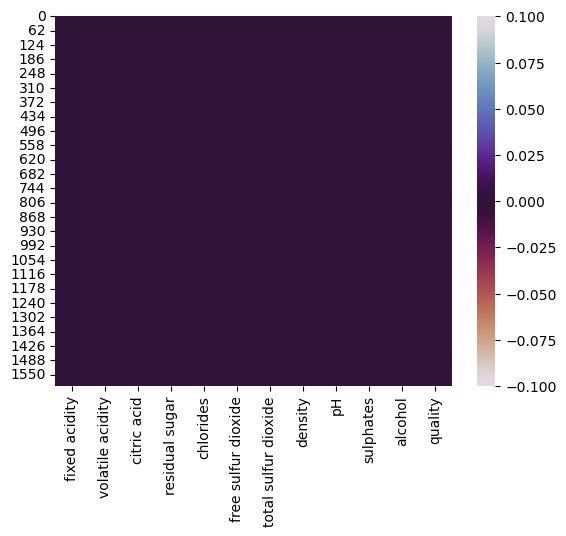

In [187]:

sns.heatmap(df.isnull(),cmap="twilight_r")

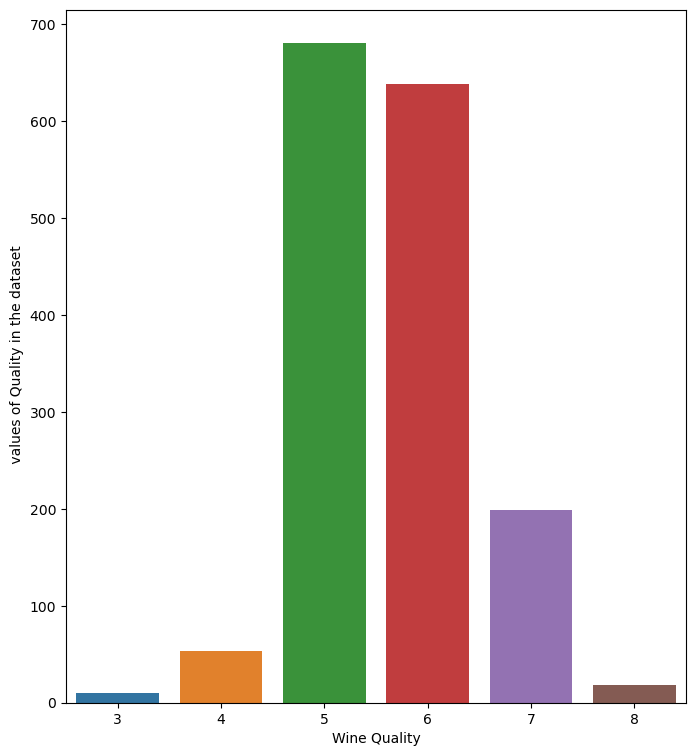

In [188]:
plt.figure(figsize=(8,9))
sns.countplot(x='quality',data=df)
plt.xlabel('Wine Quality')
plt.ylabel(' values of Quality in the dataset')
plt.show()

<Figure size 800x900 with 0 Axes>

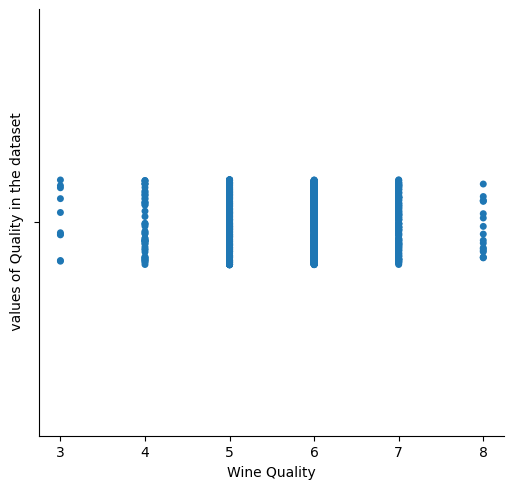

In [189]:
plt.figure(figsize=(8,9))
sns.catplot(x='quality',data=df)
plt.xlabel('Wine Quality')
plt.ylabel(' values of Quality in the dataset')
plt.show()

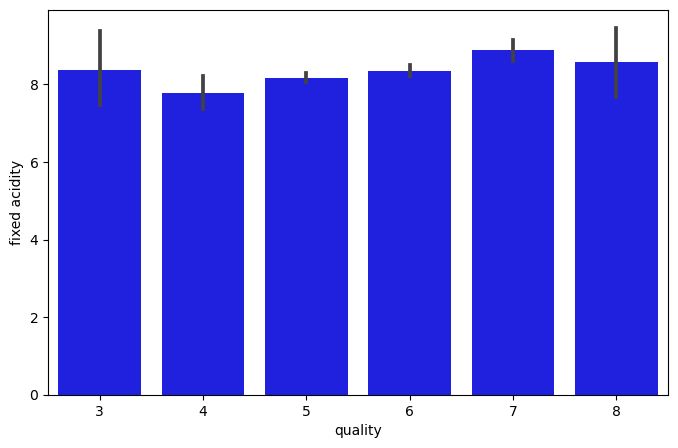

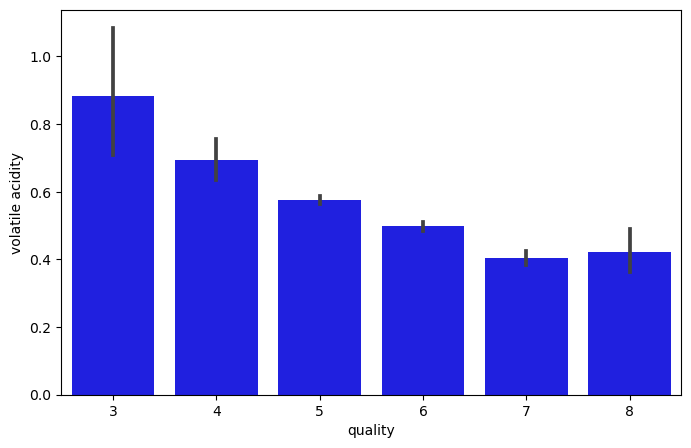

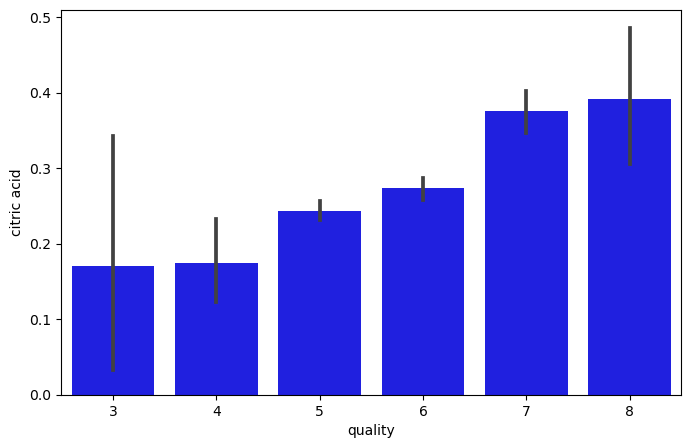

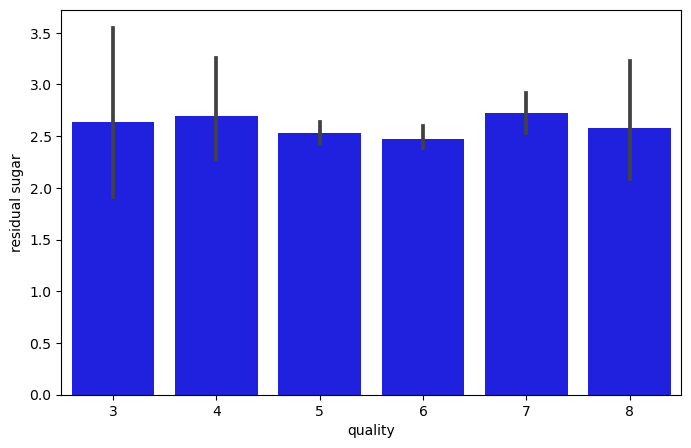

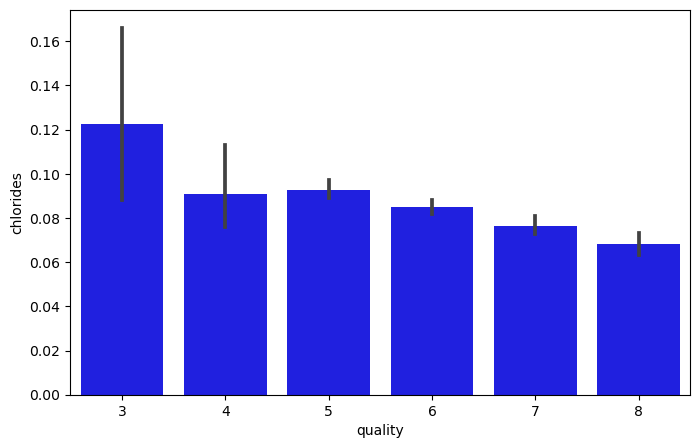

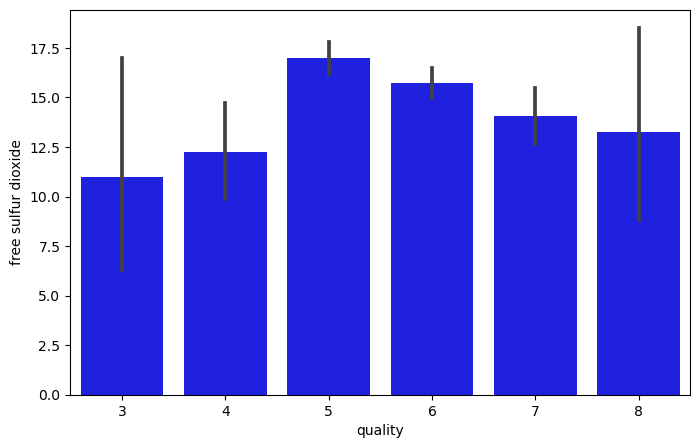

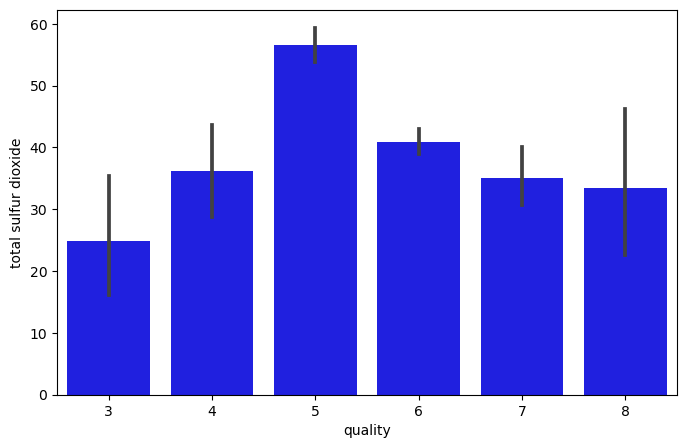

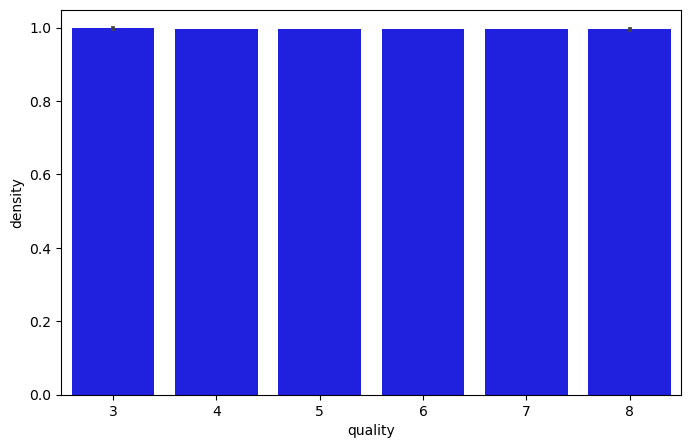

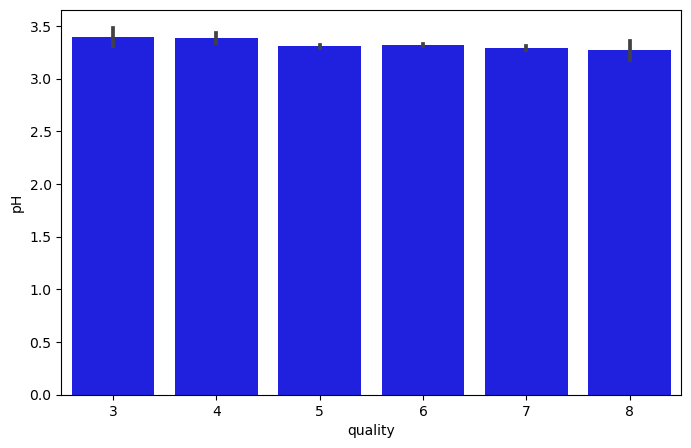

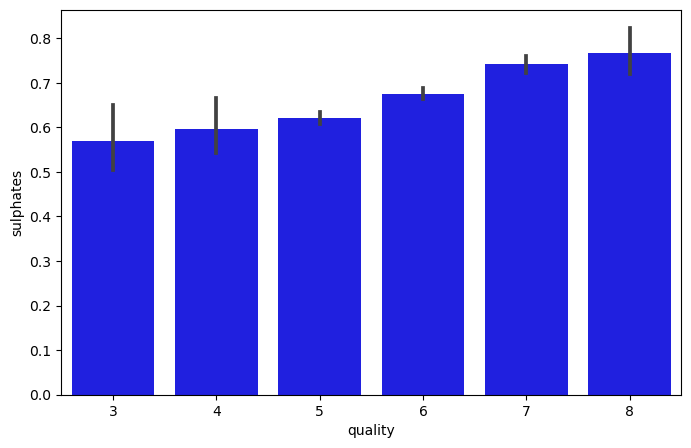

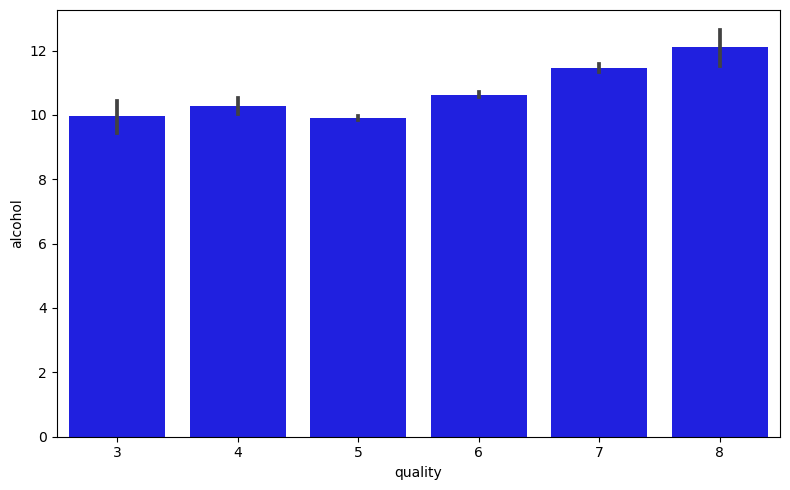

In [190]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(8,5))
    sns.barplot(x=labels, y=col[index], data=df, color="blue")
plt.tight_layout()
plt.show()

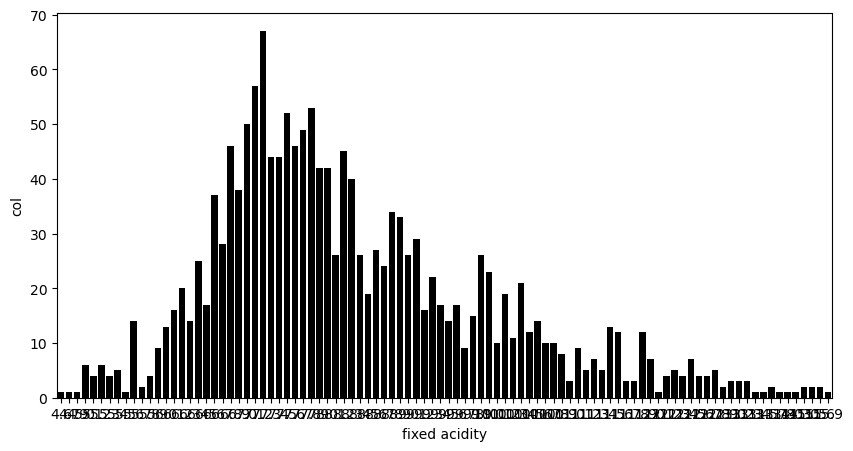

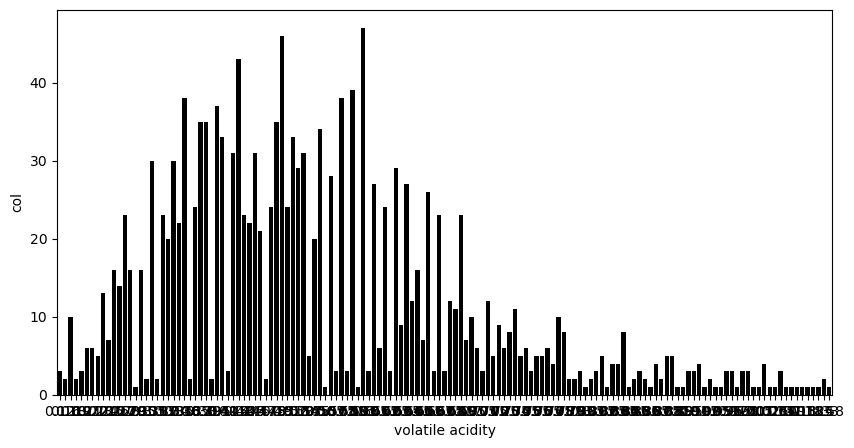

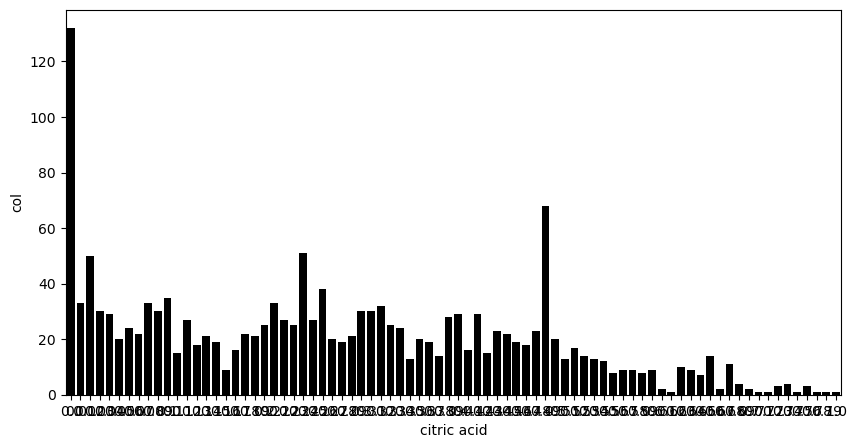

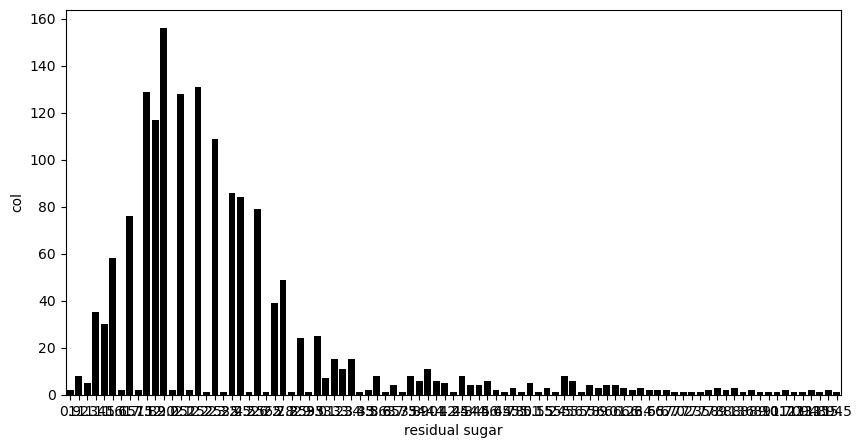

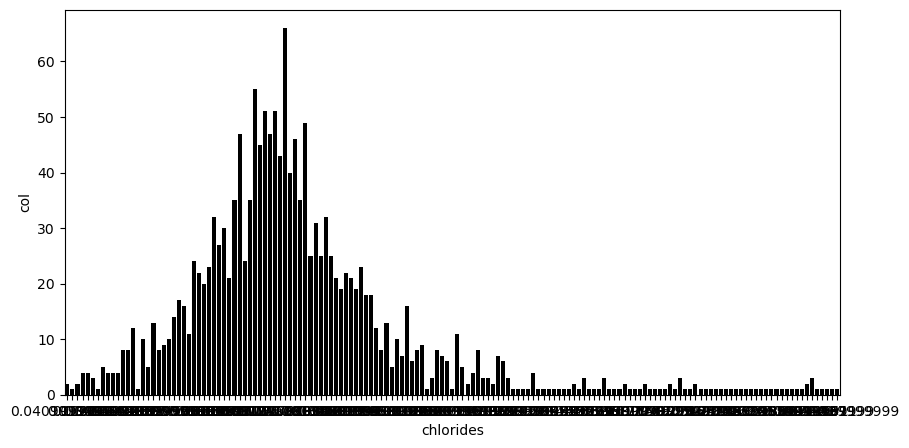

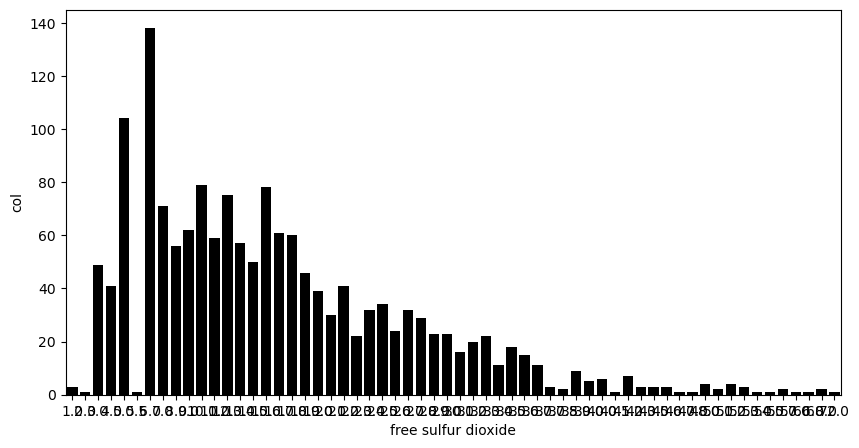

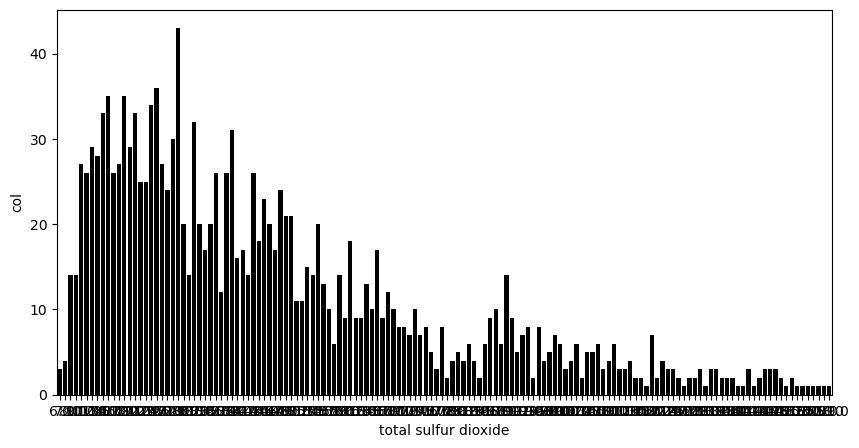

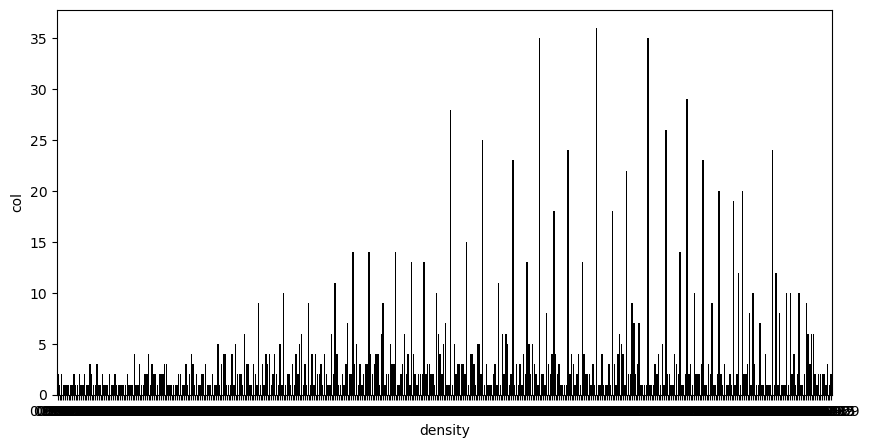

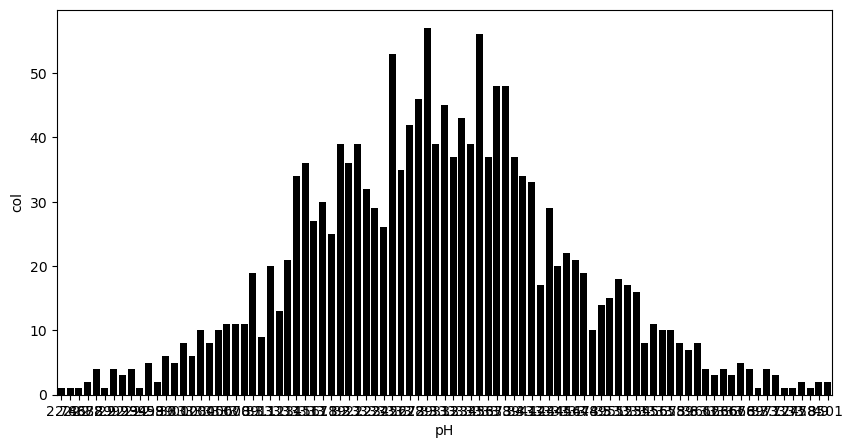

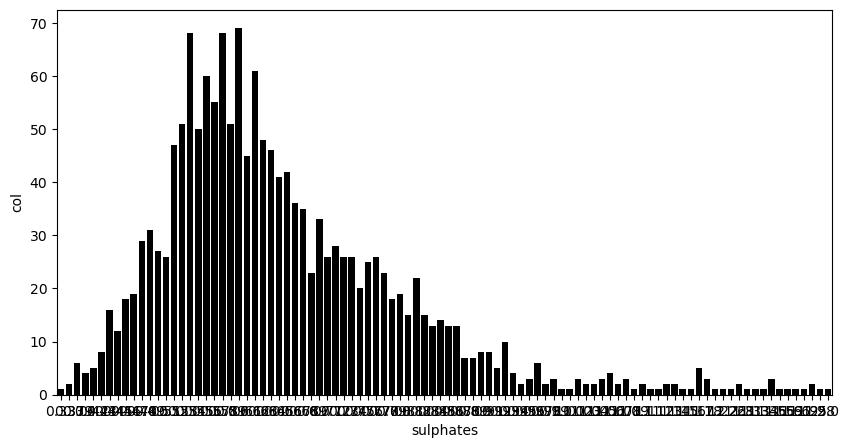

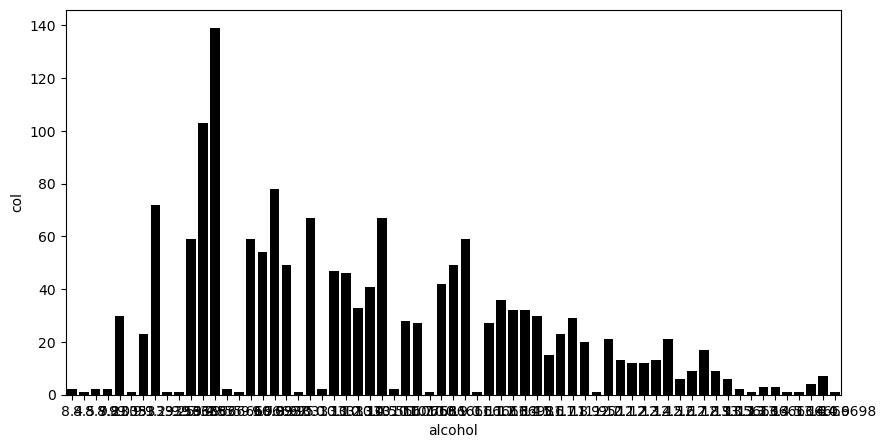

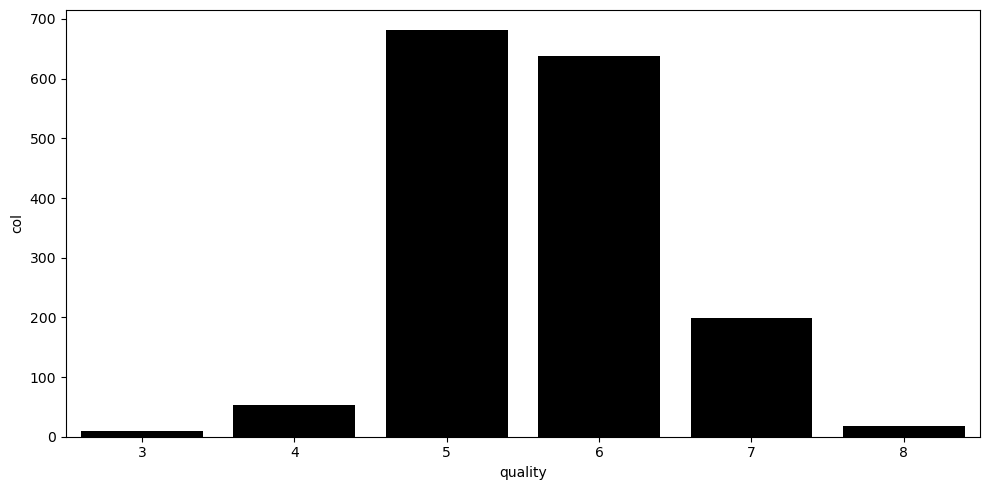

In [191]:
index=0
for col in df.items():
    plt.figure(figsize=(10,5))
    sns.countplot(x=col[index], data=df, color="black")
    plt.xlabel
    plt.ylabel('col')
plt.tight_layout()
plt.show()

We can see the trend corresponding to the influence each has in relation to forecasting the quality column (our target variable) using the feature vs label barplot.

The following observations are made in relation to the feature and the label: 1. fixed acidity vs. quality - no fixed pattern 02. There is a declining trend in volatile acidity relative to quality. 3. There is an upward tendency in citric acid quality. 4. Quality vs. residual sugar - no discernible pattern 5. There is a declining tendency in chlorides relative to quality. 6. Free sulphur dioxide vs. quality - no consistent trend as it fluctuates 7. Total sulphur dioxide vs. quality - no consistent trend as it fluctuates 8. Density vs. quality: Absolutely no trend 9. Quality vs. pH: No

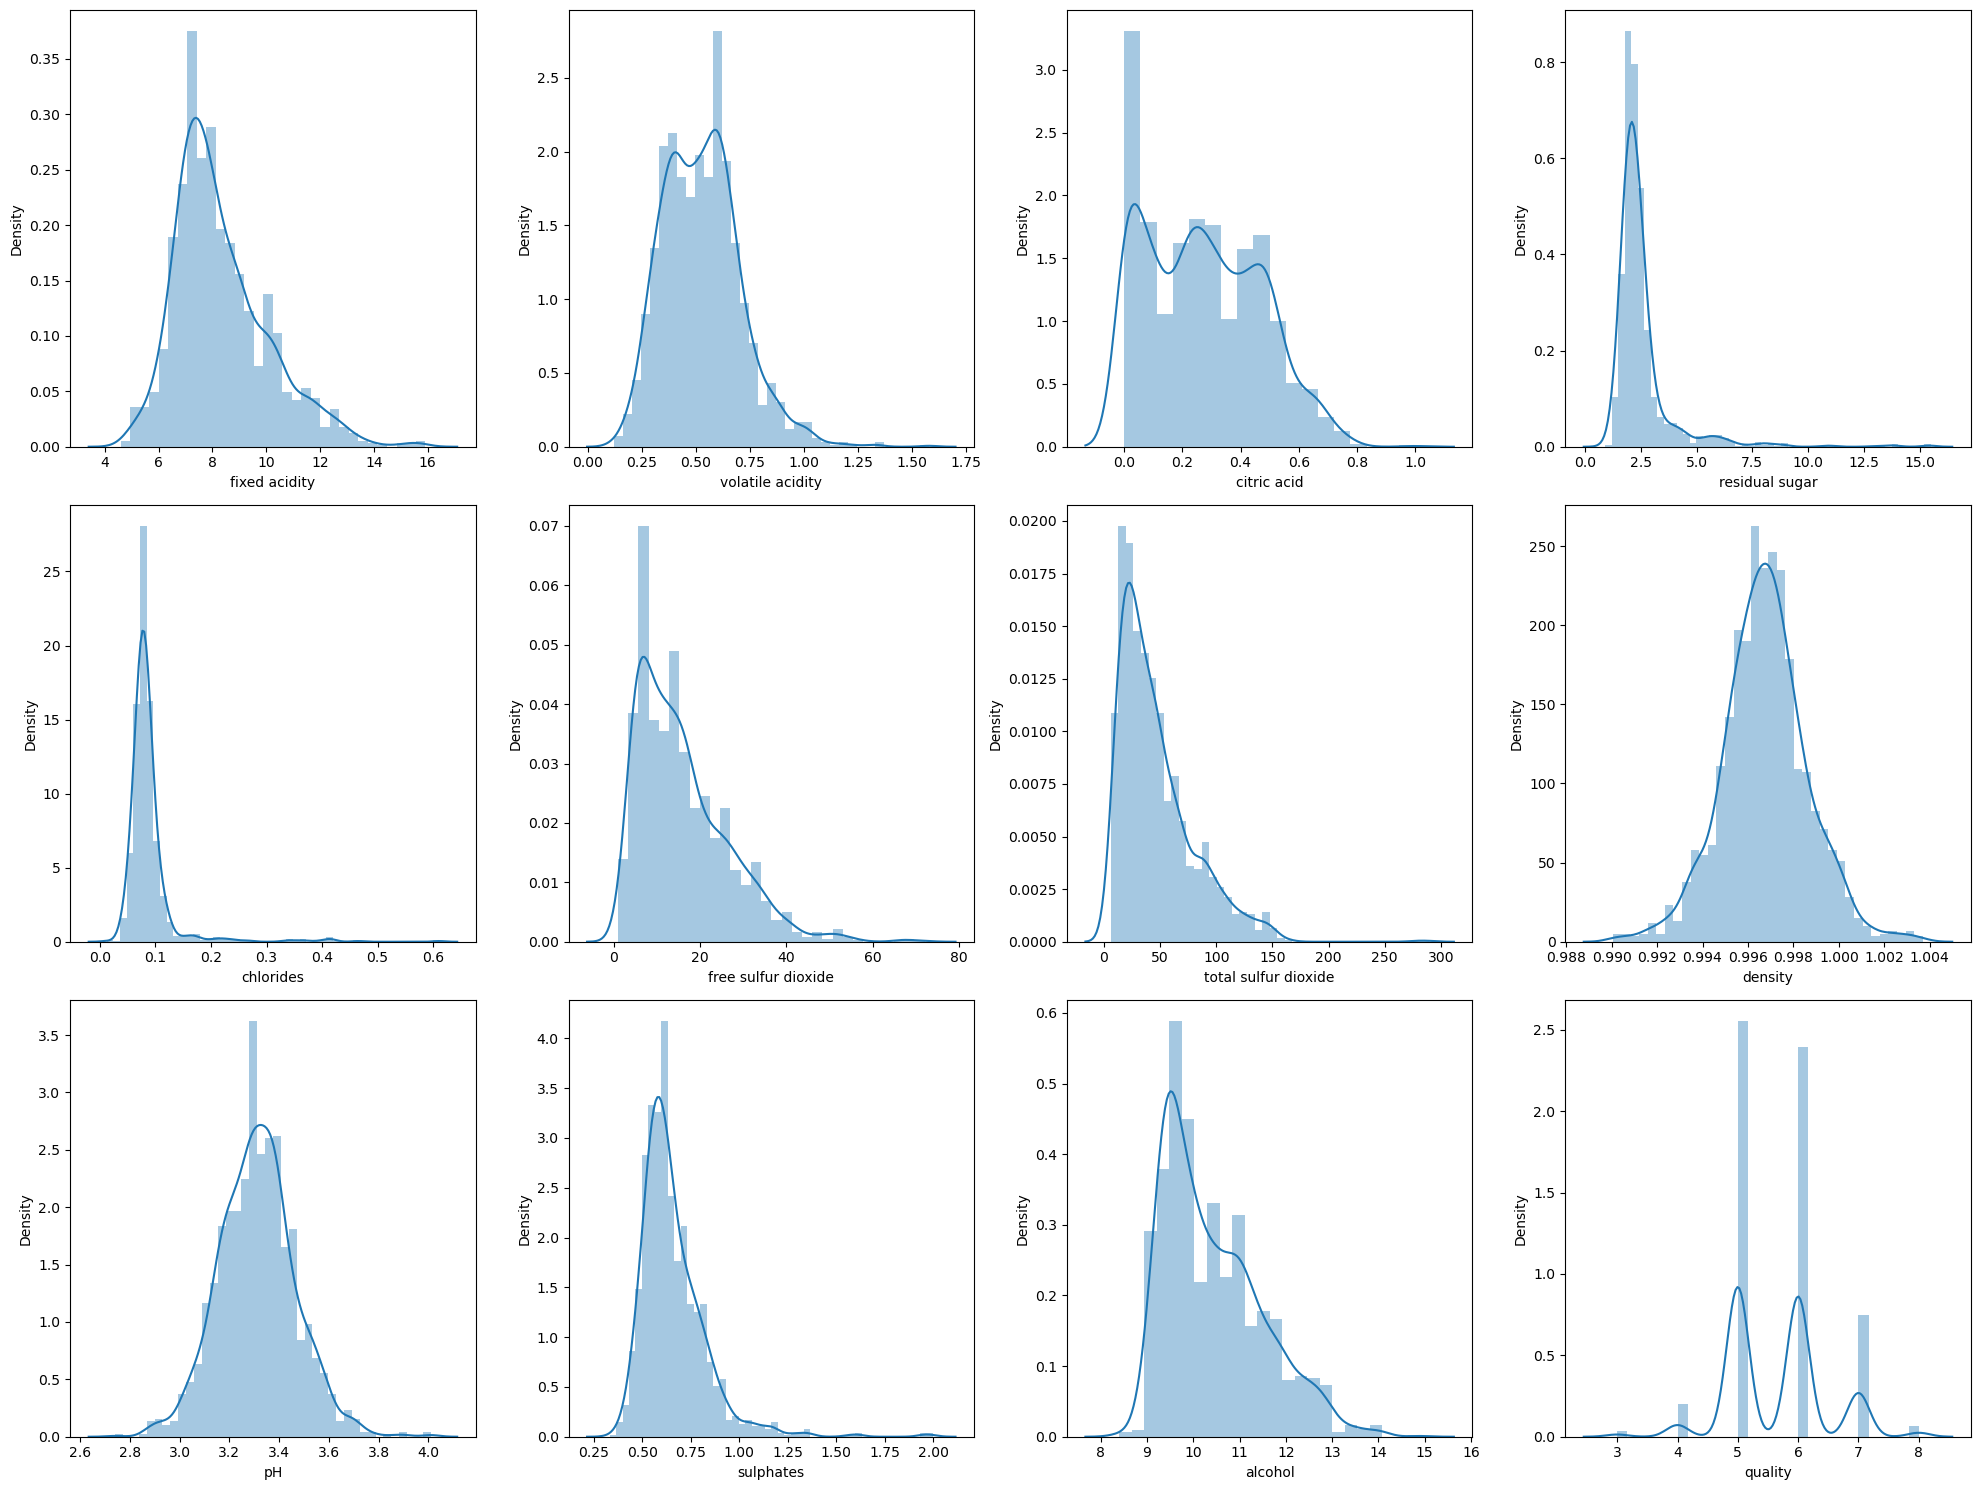

In [192]:
count = 1
plt.figure(figsize=(20,15))
for i, value in df.items():
    if count<=12:
        ax=plt.subplot(3, 4, count)
        sns.distplot(value)
    count += 1
plt.tight_layout()
plt.show()

Few of the columns fall inside the normal distribution category, as shown by the distribution plots we have drawn above, which also indicate a proper bell-shaped curve. But most feature columns, including those for citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates, and alcohol, exhibit skewness. Since the label column is a categorical column and the imbalance data inside of it has to be fixed, we shall disregard it.

After recognising how the machine learning models' accuracy is dependent on the removal or treatment of skewness and outliers, we can proceed.


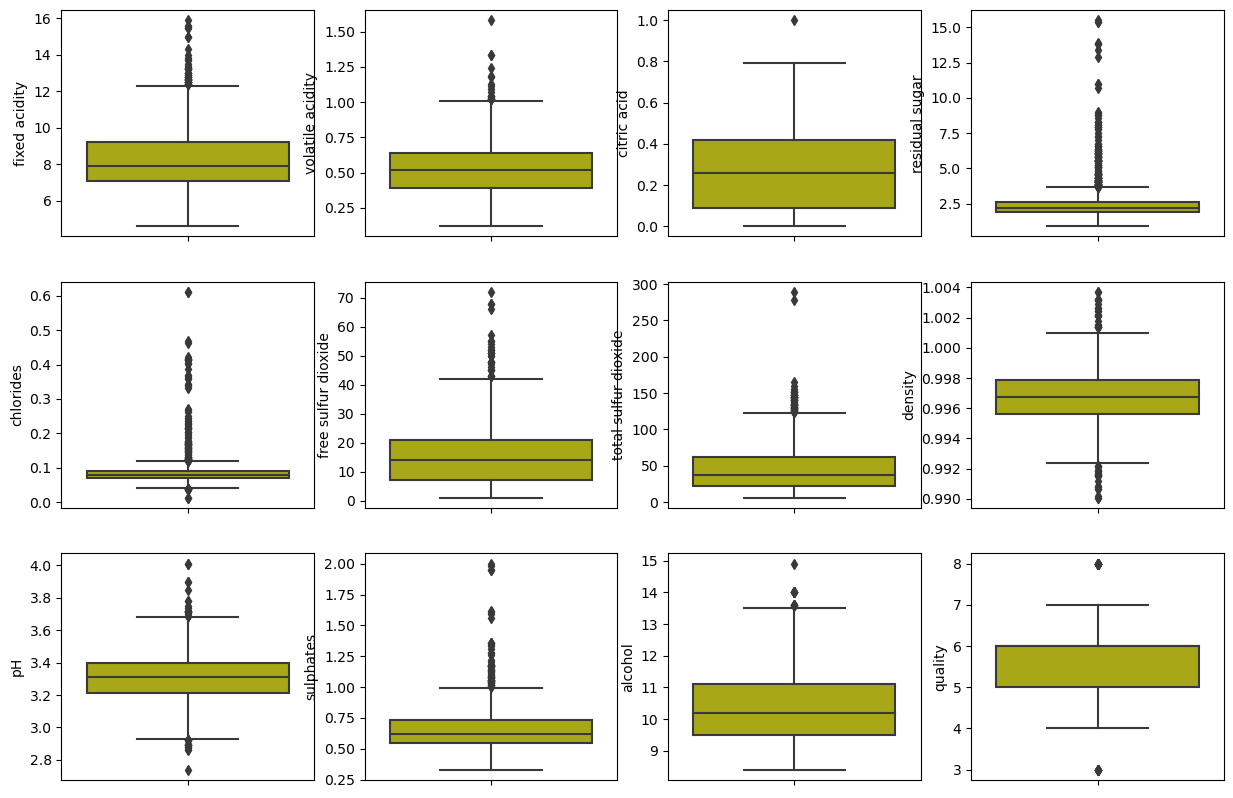

In [193]:
count = 1
plt.figure(figsize=(15,10))
for i, value in df.items():
    if count<=12:
        ax=plt.subplot(3, 4, count)
        sns.boxplot(y=i, data=df, color="y")
    count += 1
plt.show()

From box plot it is clearly visible about the presence of outliesrs which will be removed with z score analysis and also comply with non graphical analysis about the outliers

<function matplotlib.pyplot.show(close=None, block=None)>

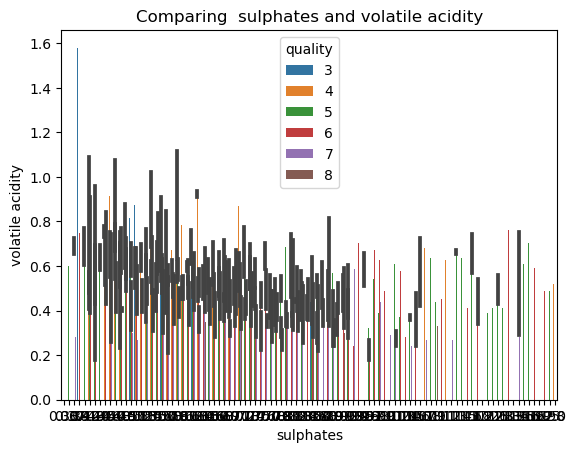

In [194]:
plt.title("Comparing  sulphates and volatile acidity")
sns.barplot(x="sulphates", y="volatile acidity", data=df, hue='quality')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

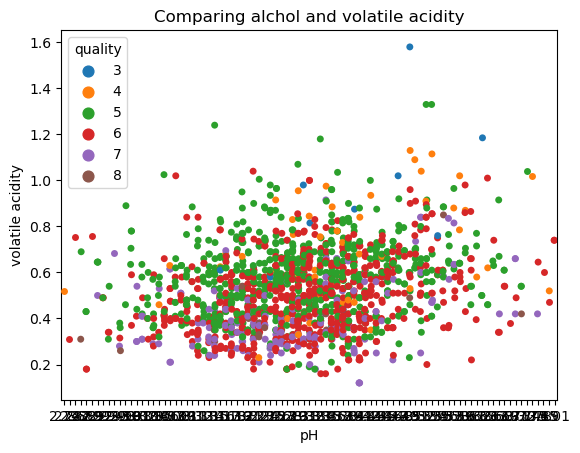

In [195]:
plt.title("Comparing alchol and volatile acidity")
sns.stripplot(x="pH", y="volatile acidity", data=df, hue='quality')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

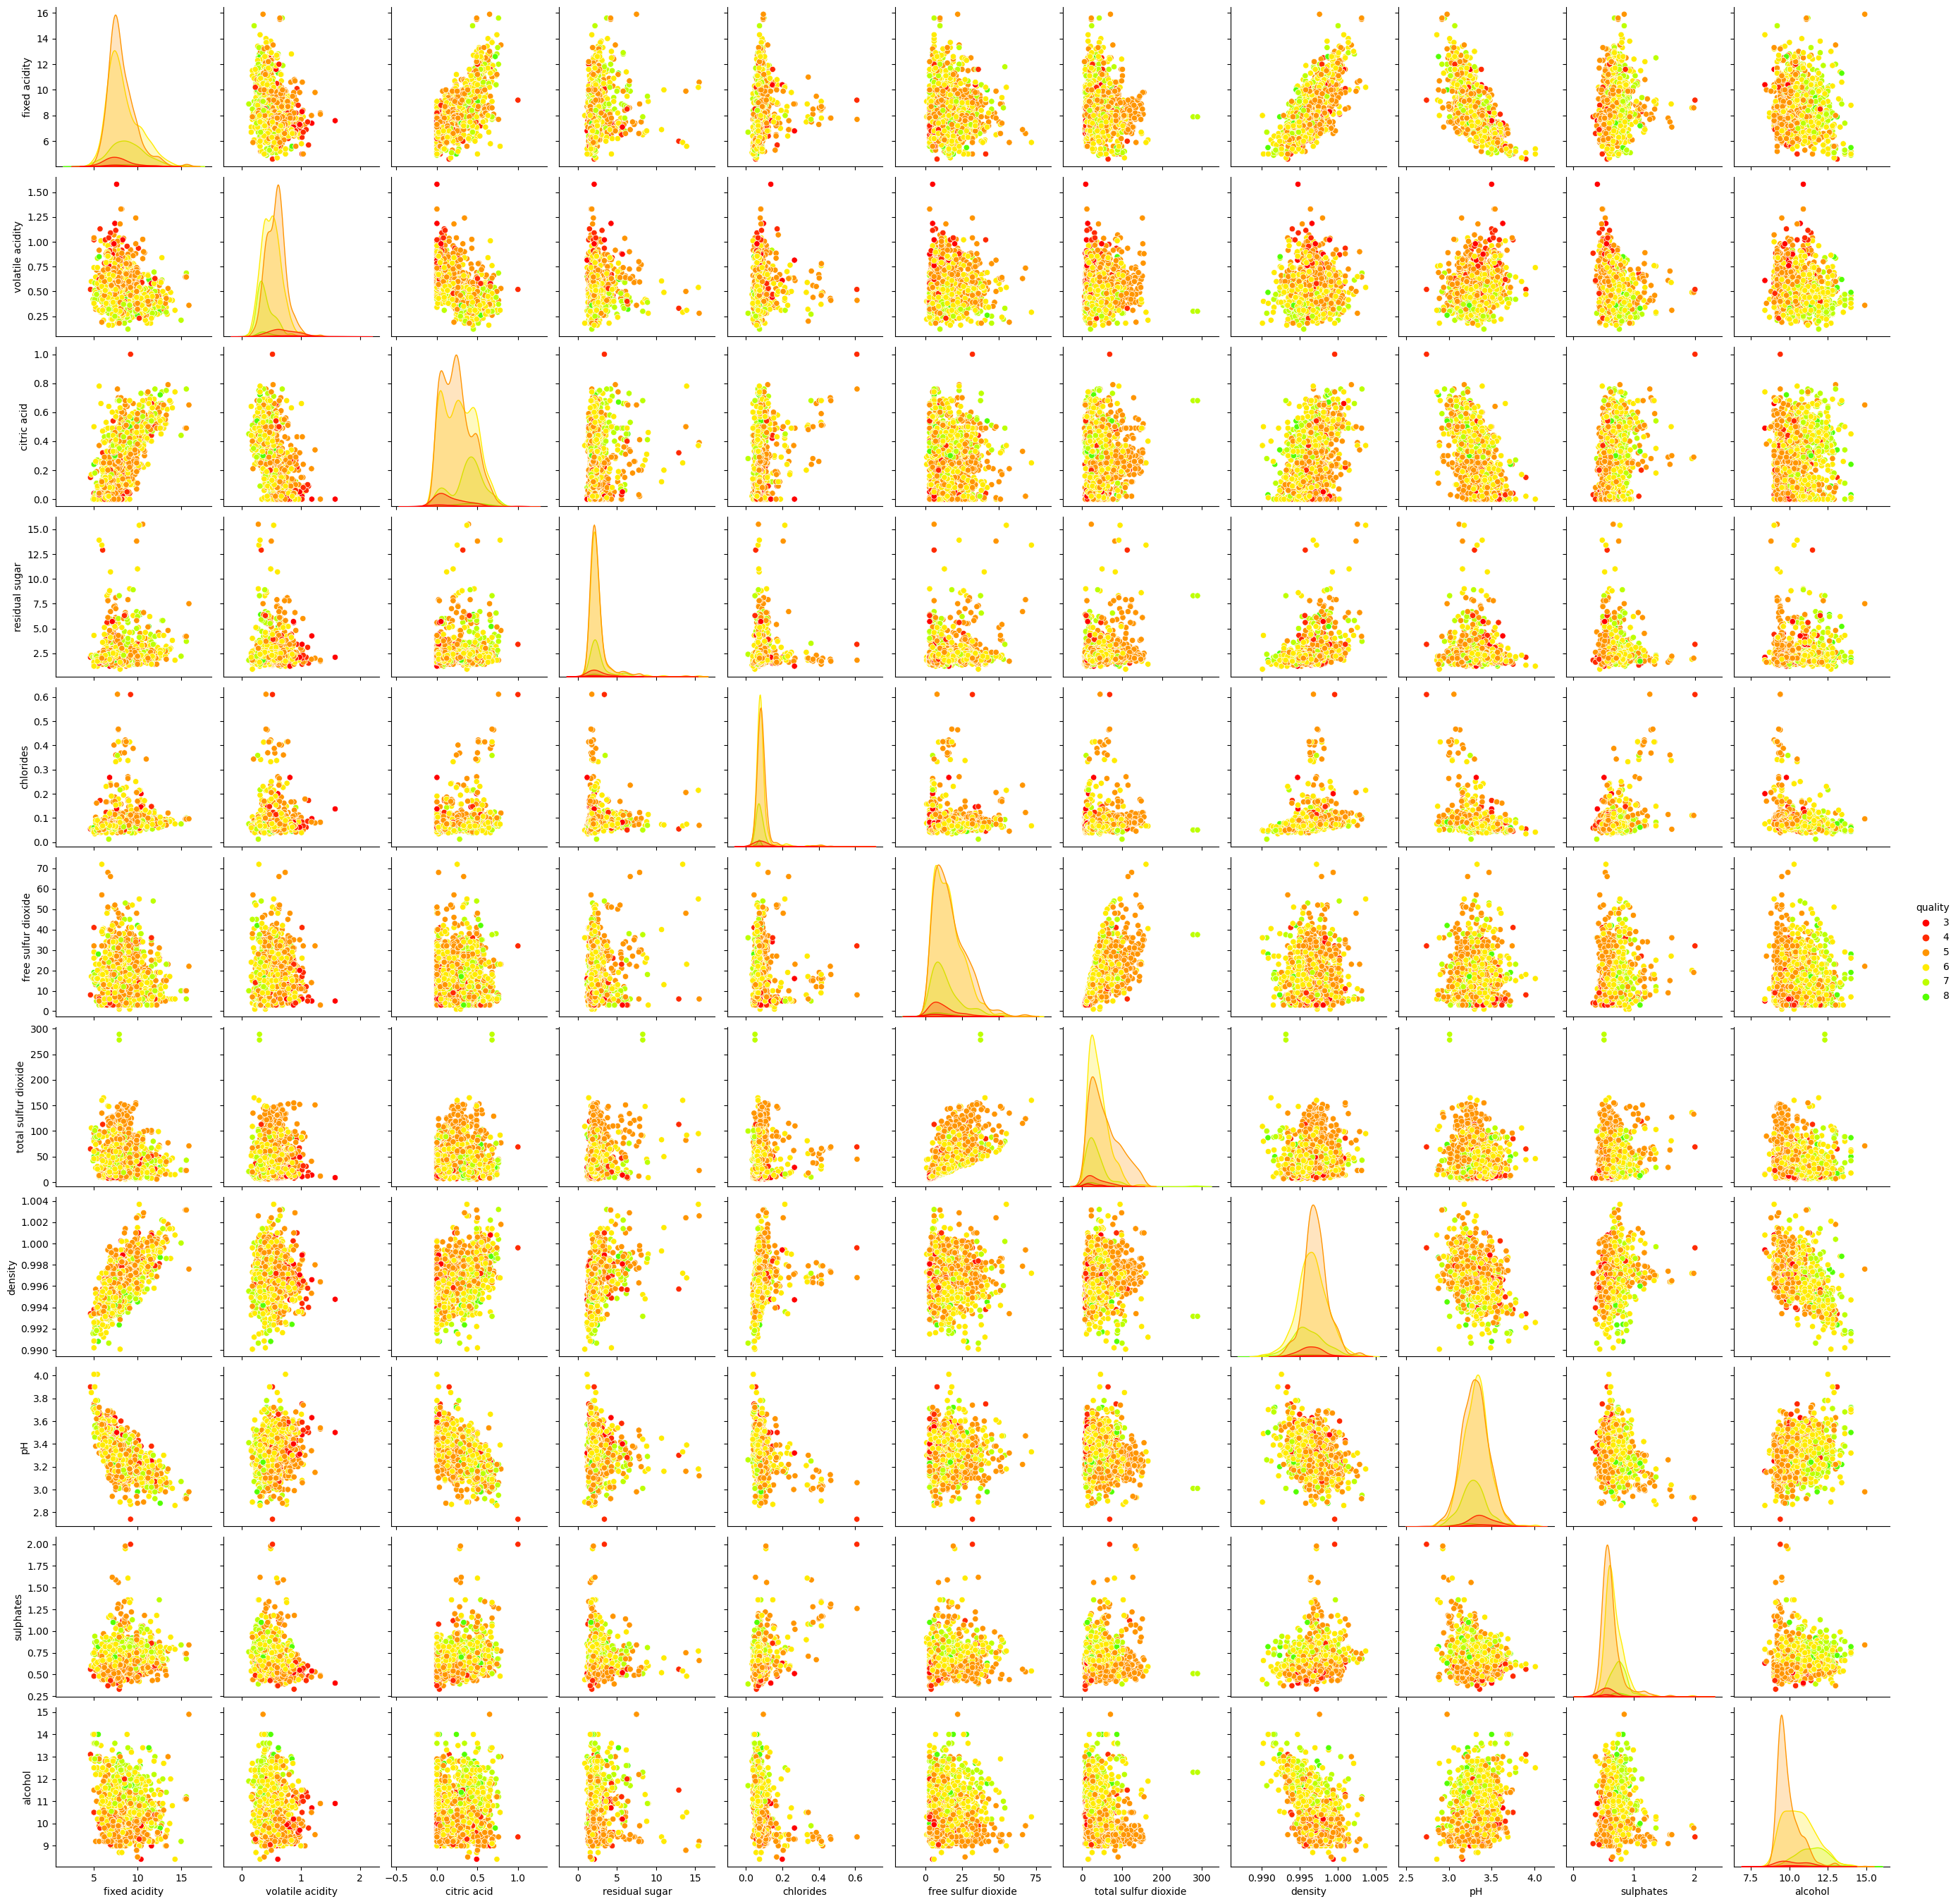

In [196]:
sns.pairplot(df, hue="quality", palette="prism")
plt.show

# checking for corellation

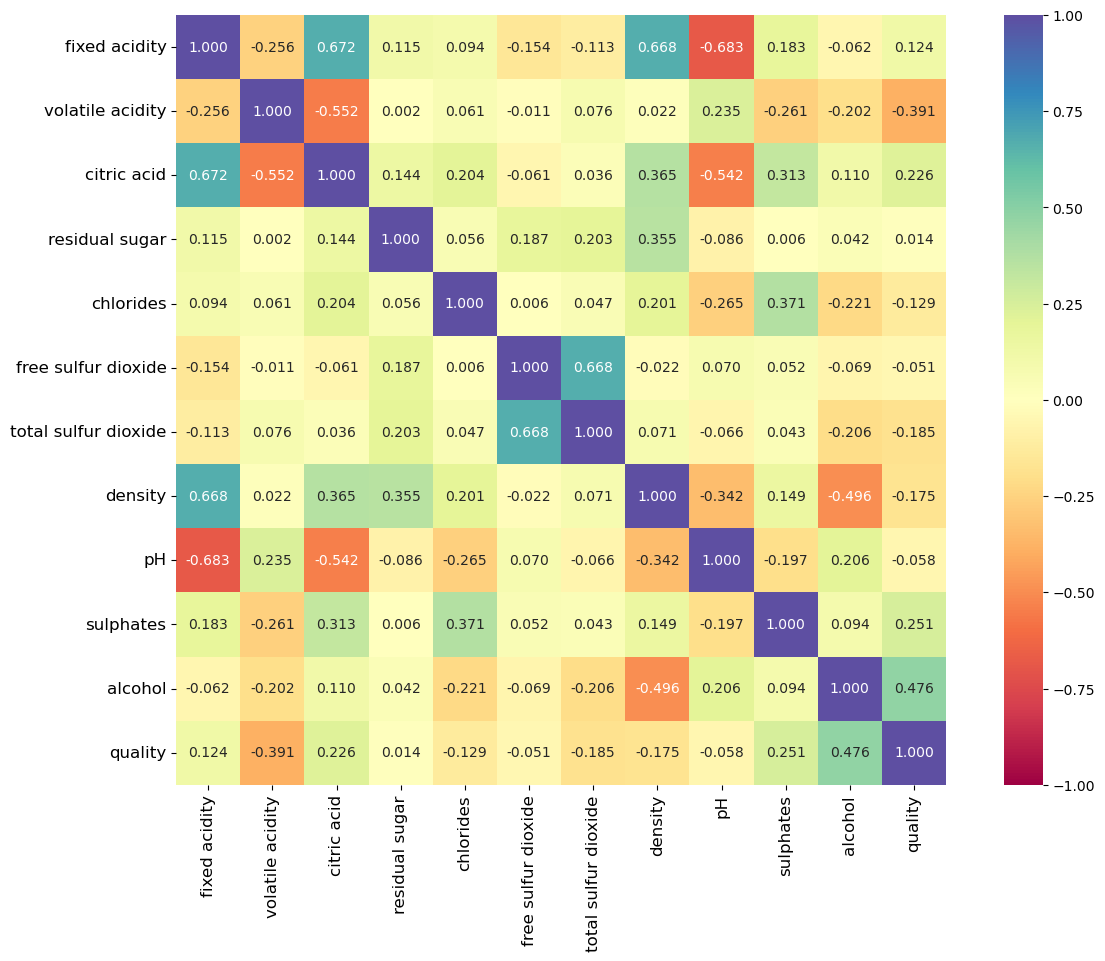

In [197]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [198]:
cor=df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

We can observe from the aforementioned correlation values that there are both positive and negative correlations between the target label and other feature columns in the correlation matrix data. There is no association between the variables, as shown by a 0 correlation. 
Ri. Additionally, some feature columns with strong positive and negative correlations may raise questions about multicollinearity. Perfect multicollinearity is when the correlation coefficient, presuming it to represent the variable "r," is precisely +1 or -1. If at all possible, one of the features should be eliminated from the model even if this 'r' is near to -1 or +1.Free sulphur dioxide and total sulphur dioxide are the other two columns that are positively connected, and their values are 0.668 and 1. Fixed acitidy and pH are the only negatively associated columns that appear, with a value of -0.683 being close to the value of -1.

Now, in order to increase the precision of our machine learning models, we may need to deal with multicollinearity later.


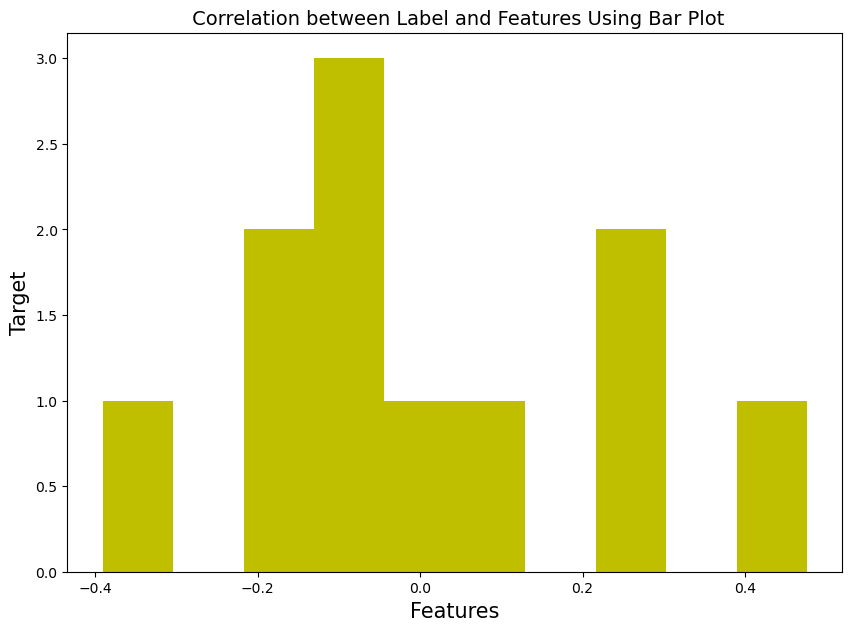

In [199]:
plt.figure(figsize=(10,7))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind='hist', color="y")
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title(" Correlation between Label and Features Using Bar Plot", fontsize= 14)
plt.show()

finding the skew ness

The fixed acidity, volatile acidity, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates, and alcohol are all now found to be outside the allowed range when we look at the skew results in the characteristics columns. These skewness numbers show that our dataset contains outliers, which we should eliminate if necessary.

to remove skewness we can use diffrent methods like sqroot,cuberoot ,log etc before that outliers to be removed

# removing outliesrs

In [200]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1451 rows x 12 columns]

In [201]:
# Percentage of Data Loss

data_loss=(1599-1485)/1599*100 
# 1599 (number of rows in the original dataframe) and 1485 (number of rows after outlier removal)
data_loss

7.129455909943714

In [202]:
df.skew()


fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [203]:
# Removing Skewness using Cuberoot Method in residual sugar
df['volatile acidity']=np.sqrt(df['volatile acidity'])
df['residual sugar']=np.sqrt(df['residual sugar'])
df['chlorides']=np.sqrt(df['chlorides'])
df['free sulfur dioxide']=np.sqrt(df['free sulfur dioxide'])
df['total sulfur dioxide']=np.sqrt(df['total sulfur dioxide'])
df['sulphates']=np.sqrt(df['sulphates'])
df['alcohol']=np.sqrt(df['alcohol'])

In [204]:
df.skew()

fixed acidity           0.823934
volatile acidity       -0.043724
citric acid             0.291297
residual sugar          1.834950
chlorides               1.305836
free sulfur dioxide     0.320117
total sulfur dioxide    0.557106
density                 0.055738
pH                      0.114705
sulphates               0.614878
alcohol                 0.674270
quality                 0.407865
dtype: float64

In [205]:
# Removing Skewness using Cuberoot Method in residual sugar
df['volatile acidity']=np.cbrt(df['volatile acidity'])
df['residual sugar']=np.cbrt(df['residual sugar'])
df['chlorides']=np.cbrt(df['chlorides'])
df['free sulfur dioxide']=np.cbrt(df['free sulfur dioxide'])
df['total sulfur dioxide']=np.cbrt(df['total sulfur dioxide'])
df['sulphates']=np.cbrt(df['sulphates'])
df['alcohol']=np.cbrt(df['alcohol'])

In [206]:
df.skew()


fixed acidity           0.823934
volatile acidity       -0.349599
citric acid             0.291297
residual sugar          1.426625
chlorides               0.750999
free sulfur dioxide    -0.079646
total sulfur dioxide    0.124783
density                 0.055738
pH                      0.114705
sulphates               0.433149
alcohol                 0.619395
quality                 0.407865
dtype: float64

In [207]:
df['residual sugar']=np.log(df['residual sugar'])
df['chlorides']=np.log(df['chlorides'])
df['sulphates']=np.log(df['sulphates'])
df['fixed acidity']=np.log(df['fixed acidity'])

In [208]:
df.skew()

fixed acidity           0.377931
volatile acidity       -0.349599
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide    -0.079646
total sulfur dioxide    0.124783
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.619395
quality                 0.407865
dtype: float64

The fixed acidity, volatile acidity, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates, and alcohol are all now found to be outside the allowed range when we look at the skew results in the characteristics columns. These skewness numbers show that our dataset contains outliers, which we should eliminate if necessary.

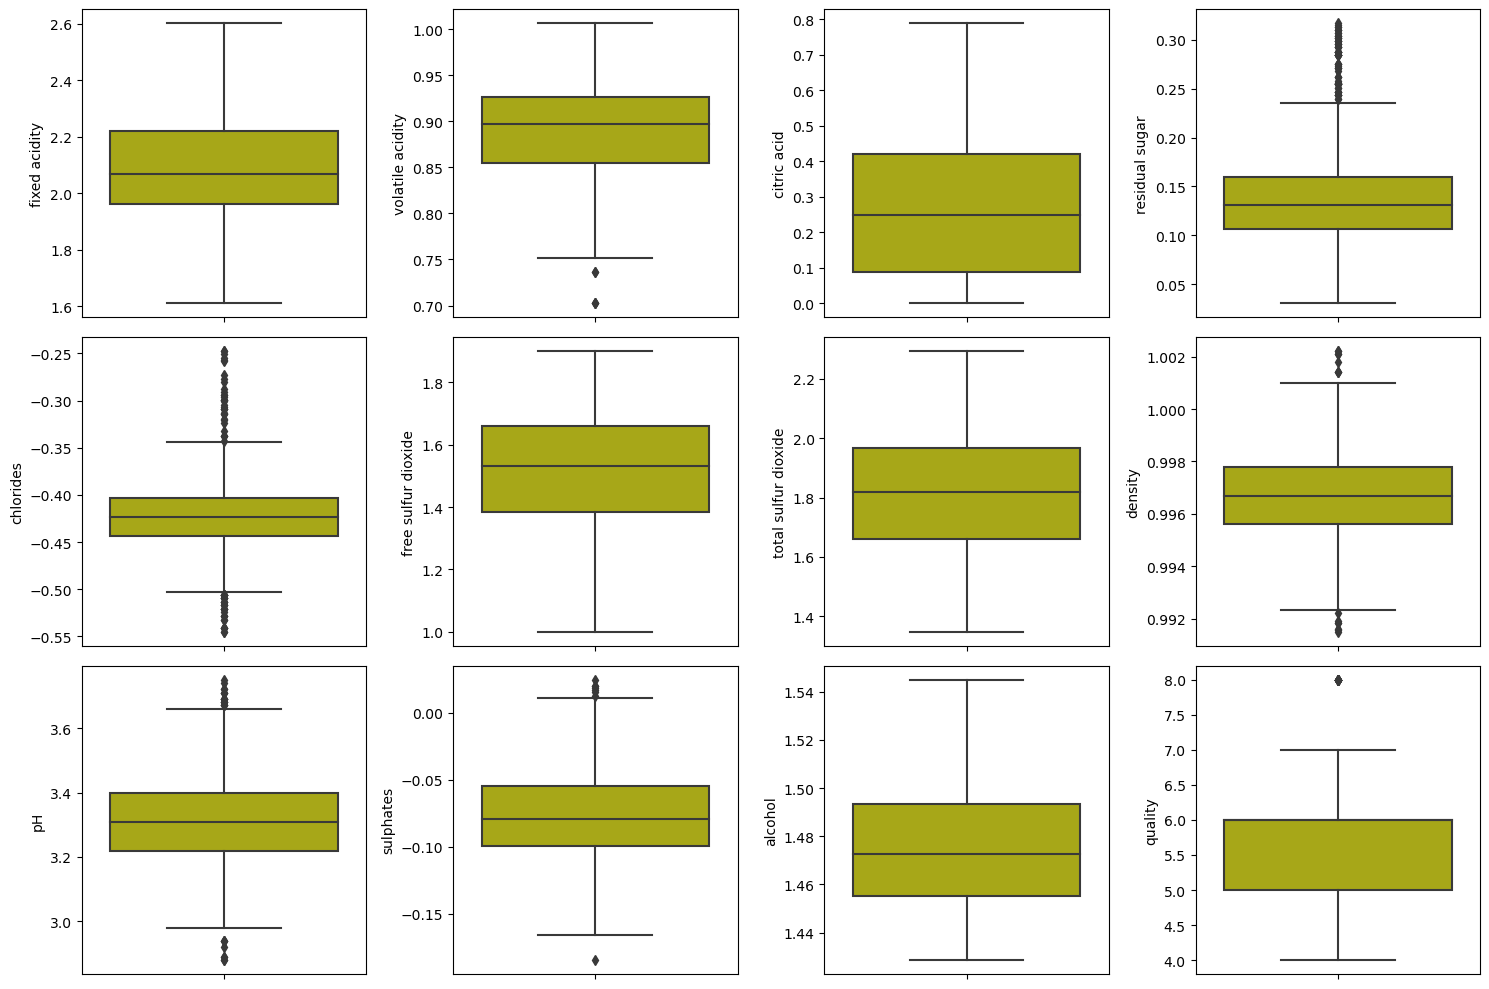

In [209]:
count = 1
plt.figure(figsize=(15,10))
for i, value in df.items():
    if count<=12:
        ax=plt.subplot(3, 4, count)
        sns.boxplot(y=i, data=df, color="y")
    count += 1
plt.tight_layout()
plt.show()

from above box plot we can see the removal of max outliers


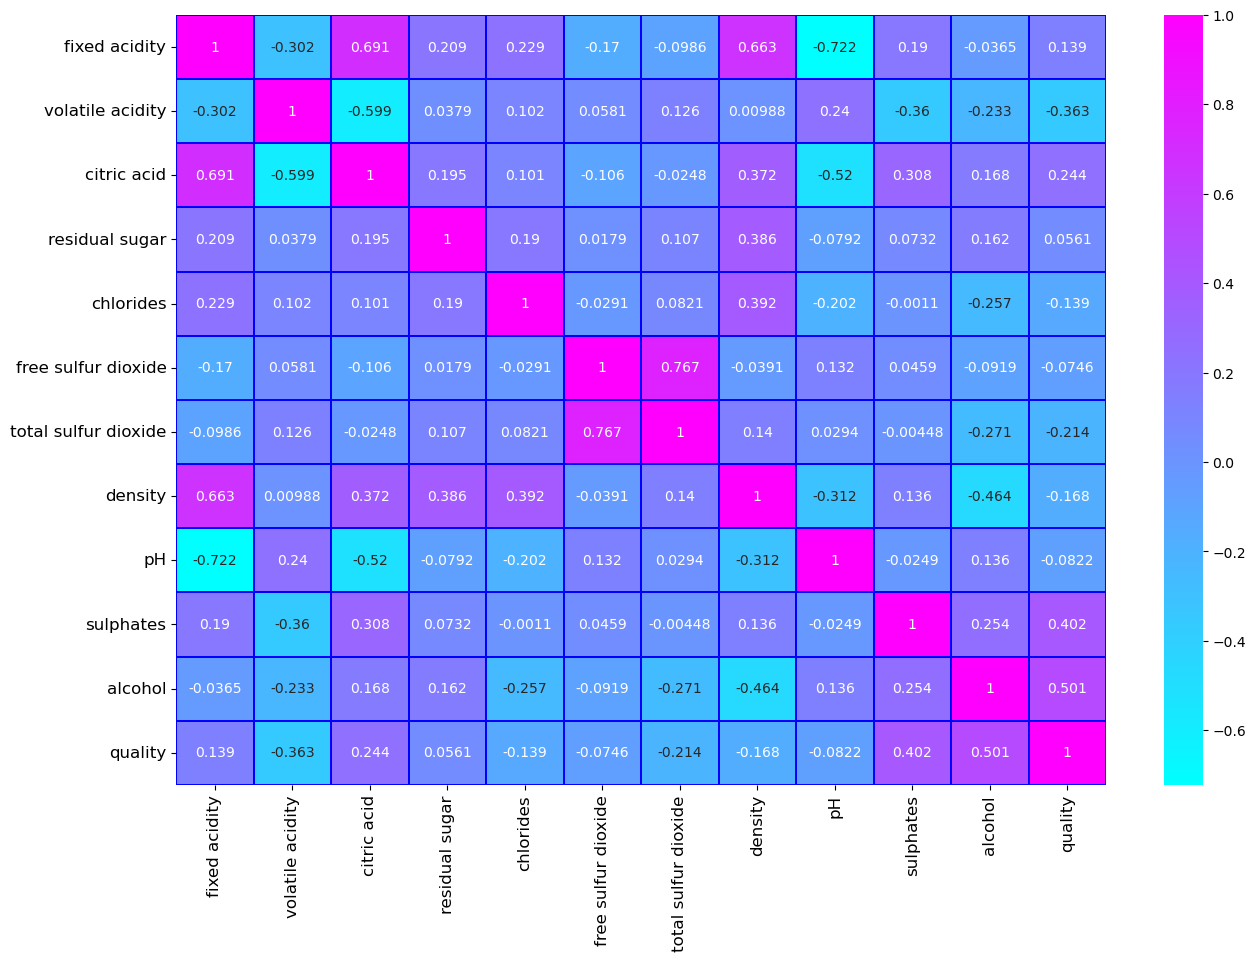

In [210]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), linewidths=0.3, fmt=".3g", linecolor= "blue", annot= True, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [211]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [212]:
# checking for balance
Y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [213]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

now we can see afte implentatiom of ove sampling method for the out put

In [214]:
#lets check the class imbalance is handled or not
Y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

In [215]:
# Feature Selection and Label Binarization

In [216]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3080    1
3081    1
3082    1
3083    1
3084    1
Name: quality, Length: 3085, dtype: int64

 Standard Scaling utilization for features
 scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

In [217]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.586239          1.058520    -1.492322       -0.690338  -0.036535   
1         -0.306442          1.760924    -1.492322        0.361467   1.185684   
2         -0.306442          1.307863    -1.288206       -0.049662   0.881954   
3          1.616443         -1.500284     1.365307       -0.690338  -0.100210   
4         -0.586239          1.058520    -1.492322       -0.690338  -0.036535   
...             ...               ...          ...             ...        ...   
3080      -0.341904         -0.890163     0.612620        0.762654   0.013205   
3081       0.798771         -1.281293     1.234180        1.257562   0.107222   
3082       1.373710         -0.912652     1.212220        0.361467  -0.431890   
3083       1.233093         -1.078351     0.928736        2.459062  -0.291798   
3084      -0.264184         -0.400342     0.145348        0.888025  -0.241108   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.040796              0.170343  0.847399  1.477113   
1                1.325503              1.273343  0.254932 -0.763571   
2                0.453530              0.908979  0.373426 -0.329891   
3                0.660366              1.085312  0.965892 -1.052692   
4               -0.040796              0.170343  0.847399  1.477113   
...                   ...                   ...       ...       ...   
3080             0.514937              0.108005  0.004135  0.084583   
3081            -0.995006             -0.918902  0.184029 -0.989893   
3082            -1.188202             -0.917578  0.491919 -1.124972   
3083            -1.188202             -1.109546  0.656486 -0.723432   
3084             0.992442              0.417625 -0.145852  0.619477   

      sulphates   alcohol  
0     -0.750579 -1.292393  
1      0.225186 -0.901216  
2     -0.001575 -0.901216  
3     -0.574221 -0.901216  
4     -0.750579 -1.292393  
...         ...       ...  
3080   1.098272  1.335798  
3081   1.609257  0.961882  
3082  -0.001575  0.197404  
3083   0.809243  1.113287  
3084   1.121531  1.642205  

[3085 rows x 11 columns]

training and testing data

In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Machine Learning Models for Classification Problem and Evaluation Metrics

In [219]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

For the classification described above, we have defined a function that will execute the train-test split, machine learning model training, label value prediction, accuracy score generation, classification report generation, cross validation score generation, and result of the difference between accuracy score and cross validation score for any machine learning model that calls for this function.

In [220]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 89.14100486223663

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       375
           1       0.83      0.90      0.87       242

    accuracy                           0.89       617
   macro avg       0.88      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617

Cross Validation Score: 87.64991896272285

Accuracy Score - Cross Validation Score is 1.4910858995137772


In [221]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.46191247974069

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       375
           1       0.92      0.97      0.94       242

    accuracy                           0.95       617
   macro avg       0.95      0.96      0.95       617
weighted avg       0.96      0.95      0.95       617

Cross Validation Score: 94.84602917341978

Accuracy Score - Cross Validation Score is 0.6158833063209102


In [222]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=1)
classify(model, X, Y)

Accuracy Score: 95.62398703403565

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       375
           1       0.93      0.96      0.95       242

    accuracy                           0.96       617
   macro avg       0.95      0.96      0.95       617
weighted avg       0.96      0.96      0.96       617

Cross Validation Score: 93.32252836304701

Accuracy Score - Cross Validation Score is 2.3014586709886373


In [223]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)

Accuracy Score: 95.46191247974069

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       375
           1       0.93      0.96      0.94       242

    accuracy                           0.95       617
   macro avg       0.95      0.96      0.95       617
weighted avg       0.96      0.95      0.95       617

Cross Validation Score: 93.32252836304701

Accuracy Score - Cross Validation Score is 2.1393841166936767


In [224]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=90)
classify(model, X, Y)

Accuracy Score: 94.32739059967585

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       375
           1       0.92      0.94      0.93       242

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617

Cross Validation Score: 93.38735818476499

Accuracy Score - Cross Validation Score is 0.9400324149108599


In [225]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=31, max_depth=10)
classify(model, X, Y)

Accuracy Score: 91.41004862236629

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       375
           1       0.89      0.90      0.89       242

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

Cross Validation Score: 89.10858995137764

Accuracy Score - Cross Validation Score is 2.3014586709886515


In [226]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=22)
classify(model, X, Y)

Accuracy Score: 91.41004862236629

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       375
           1       0.90      0.88      0.89       242

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

Cross Validation Score: 90.76175040518638

Accuracy Score - Cross Validation Score is 0.6482982171799136


In [227]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 88.97893030794165

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       375
           1       0.85      0.87      0.86       242

    accuracy                           0.89       617
   macro avg       0.88      0.89      0.88       617
weighted avg       0.89      0.89      0.89       617

Cross Validation Score: 88.29821717990276

Accuracy Score - Cross Validation Score is 0.6807131280388887


Hyper parameter tuning on the best ML Model

# since the target value is a multi classification model  the best fit will be the sv classifier with the out put values so considering the parameters for it

In [228]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [229]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [230]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [231]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [232]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 91.90064794816415


AUC ROC Curve

In [233]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

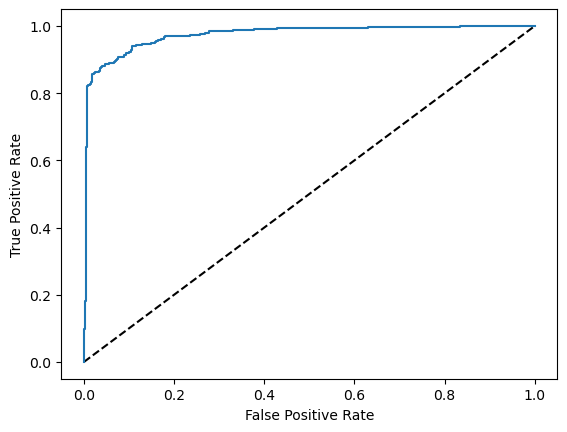

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [235]:
y_pred_prob = Final_Model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='support vector classifier (are=%f)'% roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score = roc_auc_score(X_test, Final_Model.predict(Y_test))
print('Auc Score : ','\n', auc_score)


In [236]:
from sklearn.metrics import roc_curve, auc
pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(pred,Y_test)
roc_auc = auc(fpr,tpr)


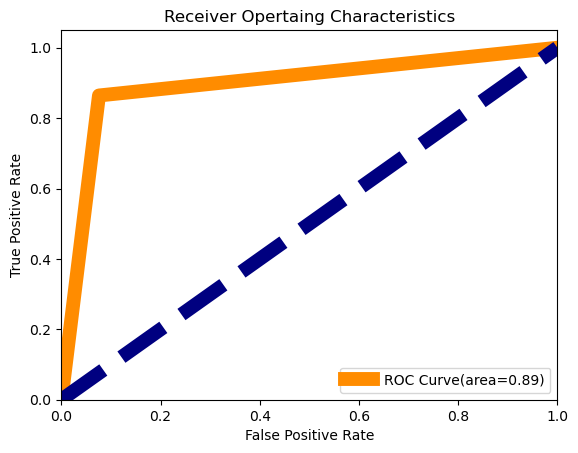

In [237]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Opertaing Characteristics")
plt.legend(loc="lower right")
plt.show()

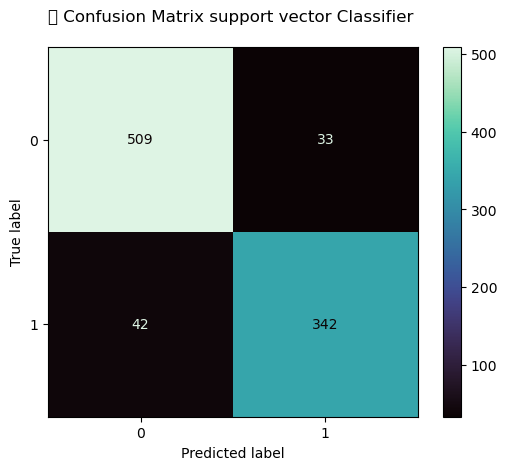

In [238]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix support vector Classifier \n')
plt.show()

Saving the Model

In [239]:
import joblib

In [240]:
#Save the model as a pickle in a file 
wine_prediction = "FinalModel_2.pkl"
joblib.dump(Final_Model,wine_prediction)

['FinalModel_2.pkl']